<div class="alert alert-block alert-info">

<h1 style="font-family:verdana;"> Description:</h1> 

<ul>
<li><p style="font-family:verdana;">
In this notebook, we are going to predict whether a person's income is above 50k or below 50k using various features like age, education, and occupation.
</p></li>
    
<li><p style="font-family:verdana;">
The dataset we are going to use is the Adult census income dataset from Kaggle which contains about 32561 rows and 15 features that can be downloaded <a href="https://www.kaggle.com/uciml/adult-census-income">here</a>.
</p></li> 

<li><p style="font-family:verdana;">
The dataset contains the labels which we have to predict and the labels are discrete and binary. So the problem we have is a Supervised Classification type.
</p></li>  
</ul>

</div>

## Step 0: Load libraries and dataset

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# import os
# os.chdir("/content/drive/MyDrive/CS50 Computer Science/Final Project")

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importing dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/hoanguyen071710/project/4254ff2306291ab5b228ca9038c32e4fb8efc336/adult.csv')

In [5]:
# Importing dataset
# dataset = pd.read_csv('adult.csv')

## Step 1: Descriptive analysis

In [6]:
# Preview dataset
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [7]:
# Shape of dataset
print('Rows: {} Columns: {}'.format(dataset.shape[0], dataset.shape[1]))

Rows: 32561 Columns: 15


In [8]:
# Features data-type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
# Statistical summary
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [10]:
# Check for null values
round((dataset.isnull().sum() / dataset.shape[0]) * 100, 2).astype(str) + ' %'

age               0.0 %
workclass         0.0 %
fnlwgt            0.0 %
education         0.0 %
education.num     0.0 %
marital.status    0.0 %
occupation        0.0 %
relationship      0.0 %
race              0.0 %
sex               0.0 %
capital.gain      0.0 %
capital.loss      0.0 %
hours.per.week    0.0 %
native.country    0.0 %
income            0.0 %
dtype: object

In [11]:
# Check for '?' in dataset
round((dataset.isin(['?']).sum() / dataset.shape[0])
      * 100, 2).astype(str) + ' %'

age                0.0 %
workclass         5.64 %
fnlwgt             0.0 %
education          0.0 %
education.num      0.0 %
marital.status     0.0 %
occupation        5.66 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital.gain       0.0 %
capital.loss       0.0 %
hours.per.week     0.0 %
native.country    1.79 %
income             0.0 %
dtype: object

In [12]:
# Checking the counts of label categories
income = dataset['income'].value_counts(normalize=True)
round(income * 100, 2).astype('str') + ' %'

<=50K    75.92 %
>50K     24.08 %
Name: income, dtype: object

In [13]:
dataset.skew()

age                0.558743
fnlwgt             1.446980
education.num     -0.311676
capital.gain      11.953848
capital.loss       4.594629
hours.per.week     0.227643
dtype: float64

<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Observations:</h3>

<ul>
    
<li><p style="font-family:verdana;">
The dataset doesn't have any null values, but it contains missing values in the form of '?' which needs to be preprocessed.
</p></li>    

<li><p style="font-family:verdana;">
The dataset is unbalanced, as the dependent feature 'income' contains 75.92% values have income less than 50k and 24.08% values have income more than 50k.
</p></li>    

</ul>

</div>

## Step 2: Exploratory Data Analysis

### 2.1: Univariate Analysis

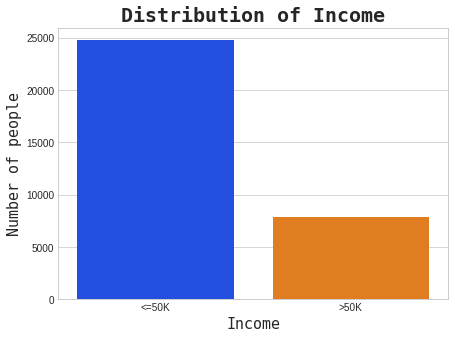

In [14]:
# Creating a barplot for 'Income'
income = dataset['income'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7, 5))
sns.barplot(income.index, income.values, palette='bright')
plt.title('Distribution of Income', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Income', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

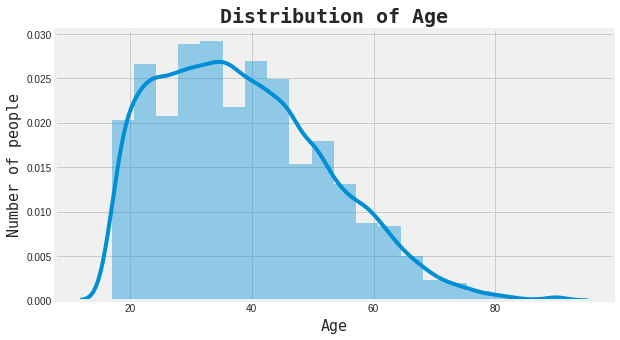

In [15]:
# Creating a distribution plot for 'Age'
age = dataset['age'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(dataset['age'], bins=20)
plt.title('Distribution of Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

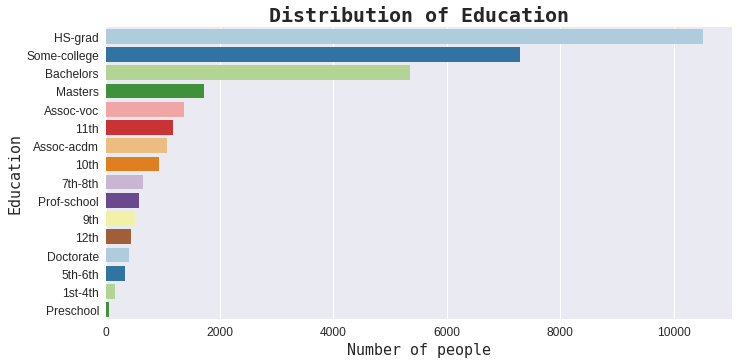

In [16]:
# Creating a barplot for 'Education'
edu = dataset['education'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
sns.barplot(edu.values, edu.index, palette='Paired')
plt.title('Distribution of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

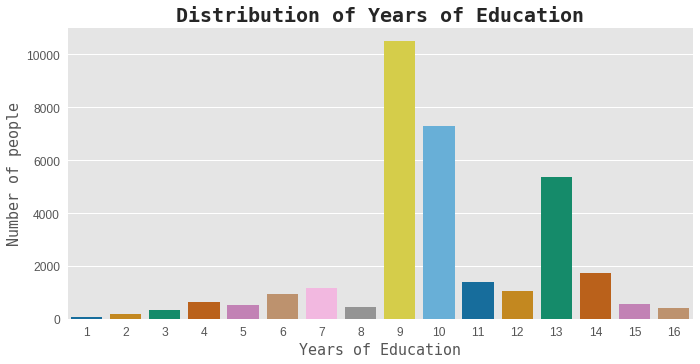

In [17]:
# Creating a barplot for 'Years of Education'
edu_num = dataset['education.num'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
sns.barplot(edu_num.index, edu_num.values, palette='colorblind')
plt.title('Distribution of Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

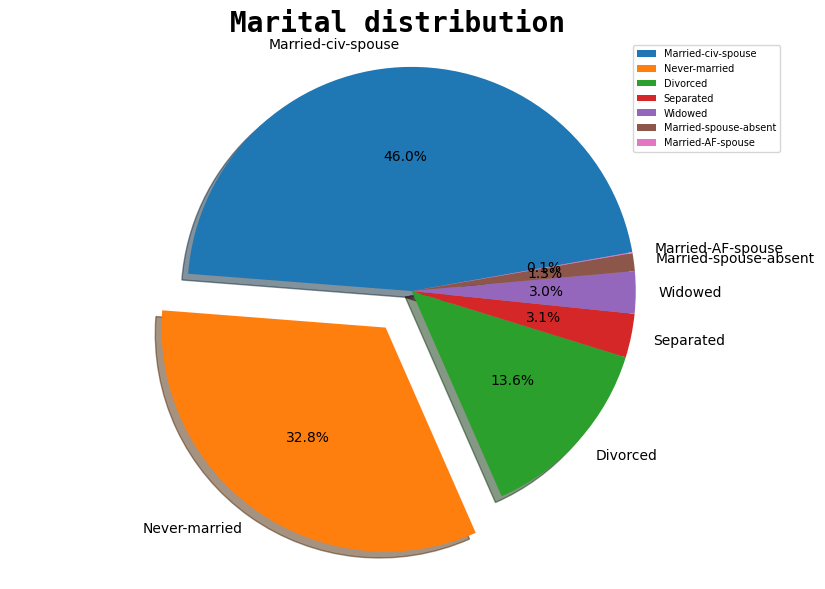

In [18]:
# Creating a pie chart for 'Marital status'
marital = dataset['marital.status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

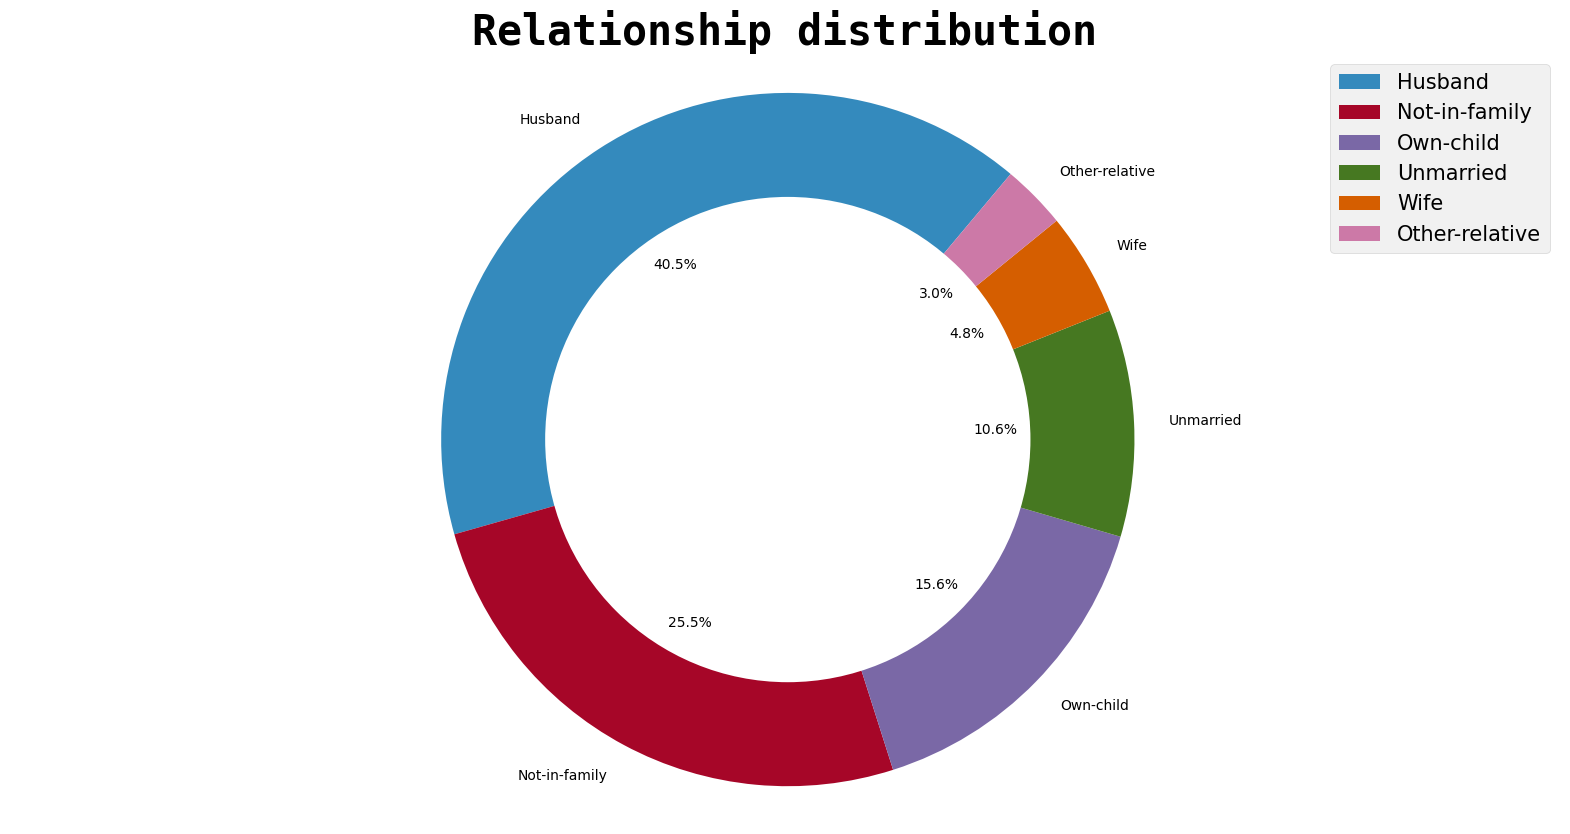

In [19]:
# Creating a donut chart for 'Age'
relation = dataset['relationship'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Relationship distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

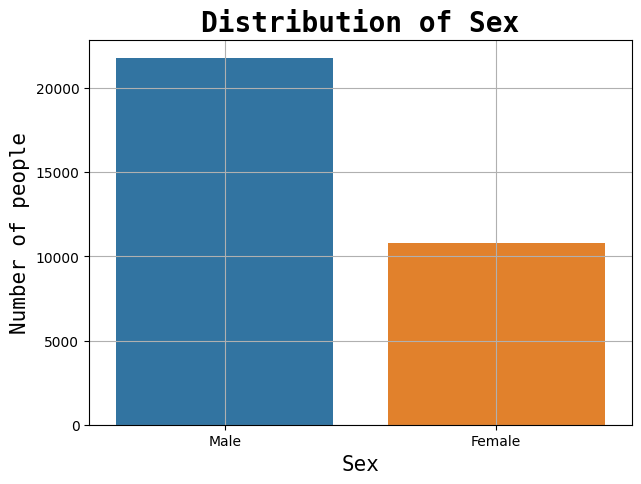

In [20]:
# Creating a barplot for 'Sex'
sex = dataset['sex'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
sns.barplot(sex.index, sex.values)
plt.title('Distribution of Sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

In [21]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


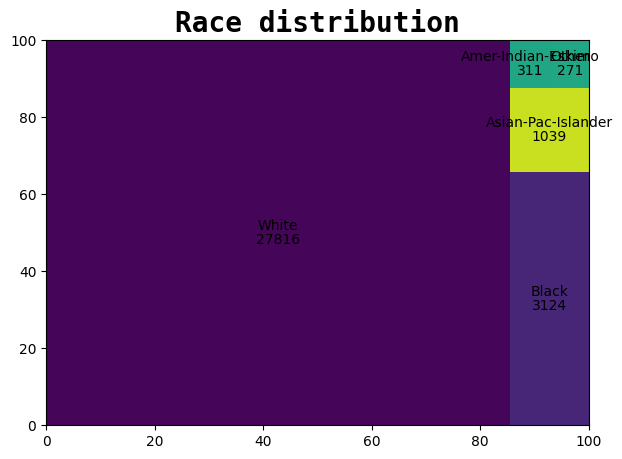

In [22]:
# Creating a Treemap for 'Race'
import squarify
race = dataset['race'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
squarify.plot(sizes=race.values, label=race.index, value=race.values)
plt.title('Race distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.show()

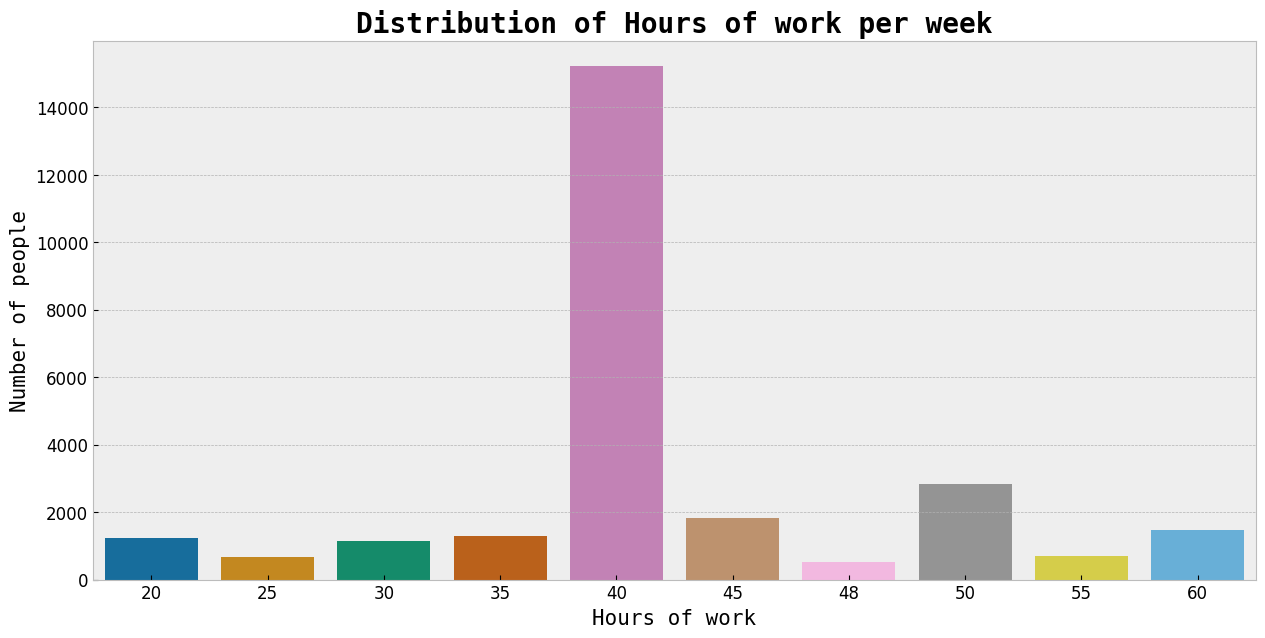

In [23]:
# Creating a barplot for 'Hours per week'
hours = dataset['hours.per.week'].value_counts().head(10)

plt.style.use('bmh')
plt.figure(figsize=(15, 7))
sns.barplot(hours.index, hours.values, palette='colorblind')
plt.title('Distribution of Hours of work per week', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Hours of work', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

### 2.2 Bivariate Analysis

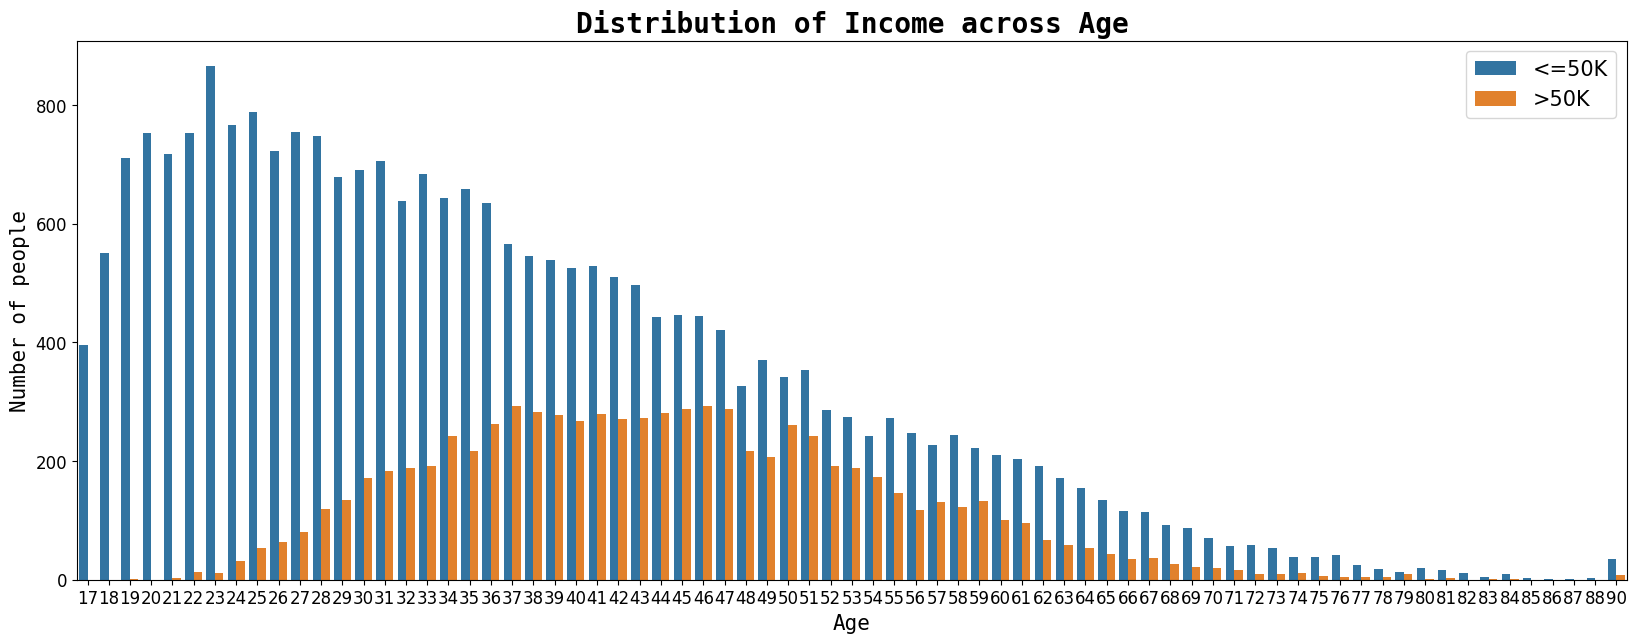

In [24]:
# Creating a countplot of income across age
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(dataset['age'], hue=dataset['income'])
plt.title('Distribution of Income across Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

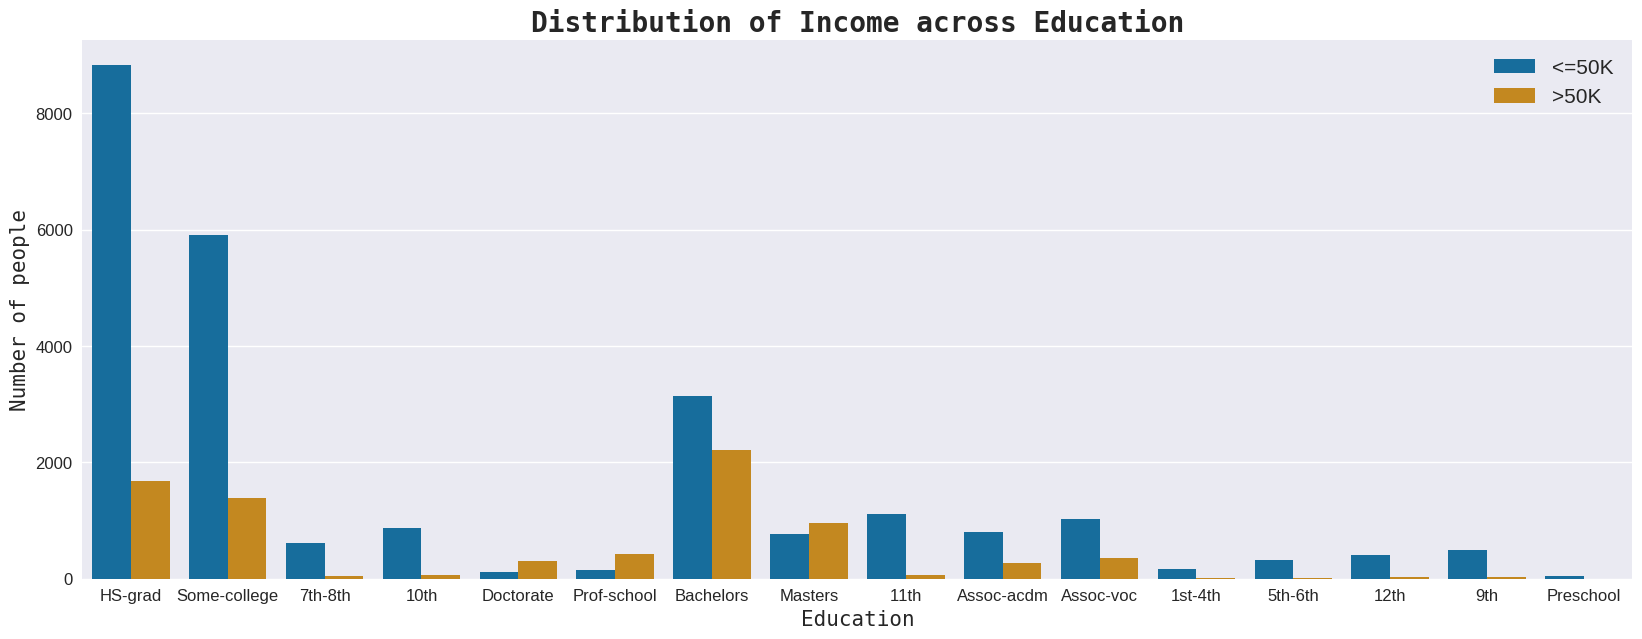

In [25]:
# Creating a countplot of income across education
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(dataset['education'],
              hue=dataset['income'], palette='colorblind')
plt.title('Distribution of Income across Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

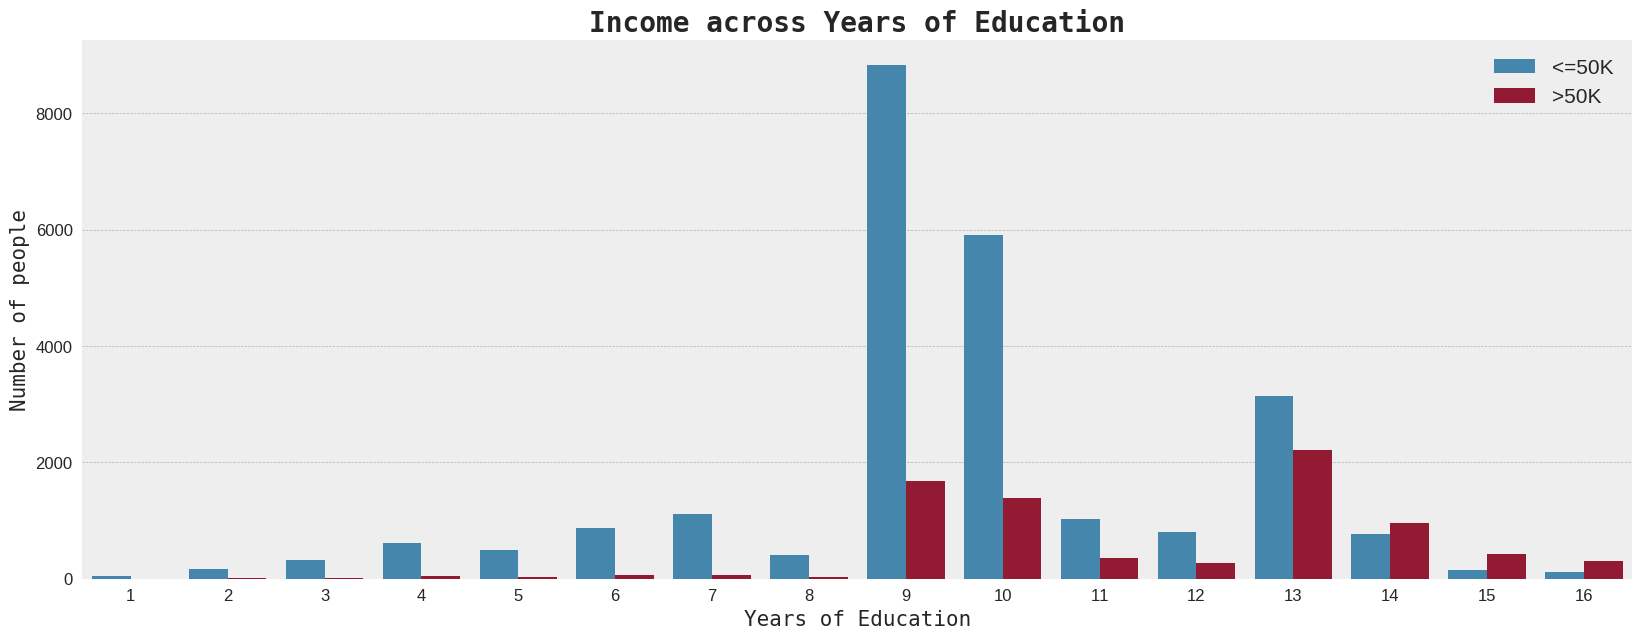

In [26]:
# Creating a countplot of income across years of education
plt.style.use('bmh')
plt.figure(figsize=(20, 7))
sns.countplot(dataset['education.num'],
              hue=dataset['income'])
plt.title('Income across Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.savefig('bi2.png')
plt.show()

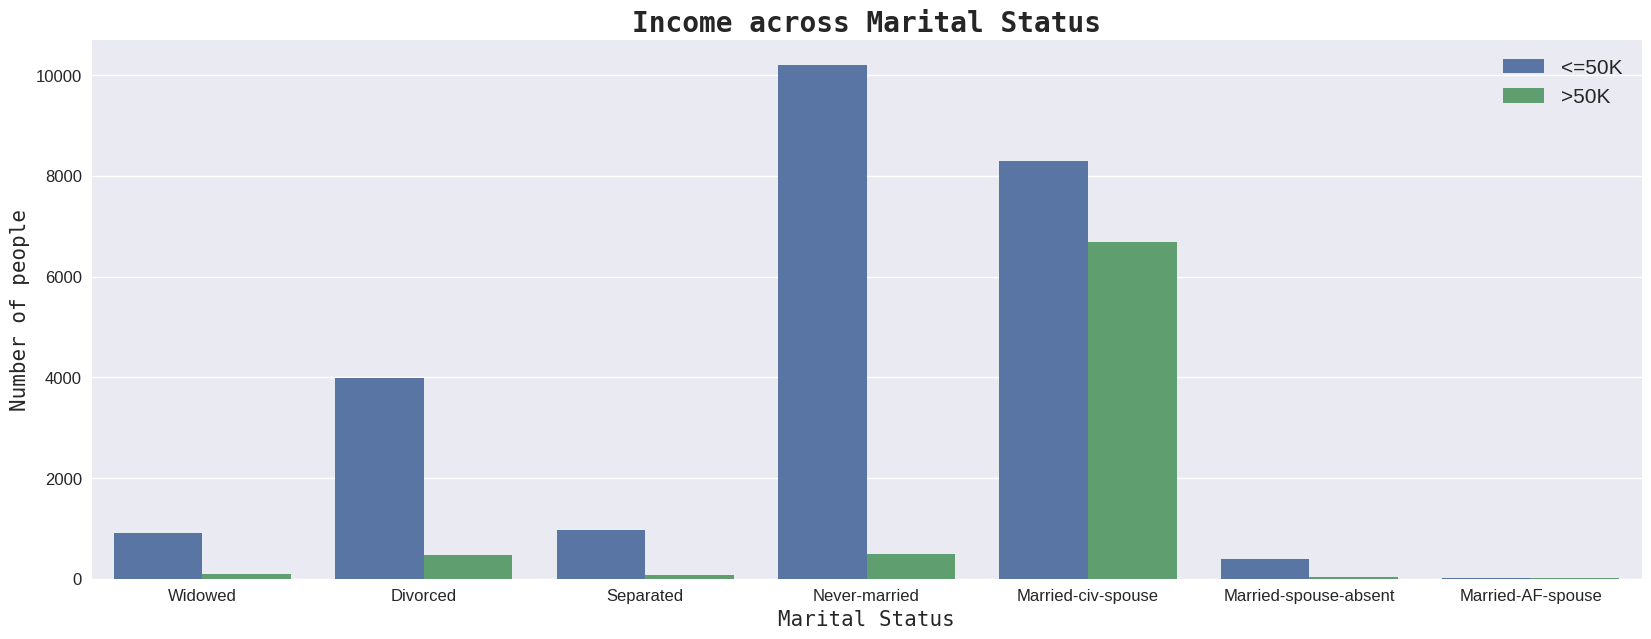

In [27]:
# Creating a countplot of income across Marital Status
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(dataset['marital.status'], hue=dataset['income'])
plt.title('Income across Marital Status', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Marital Status', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

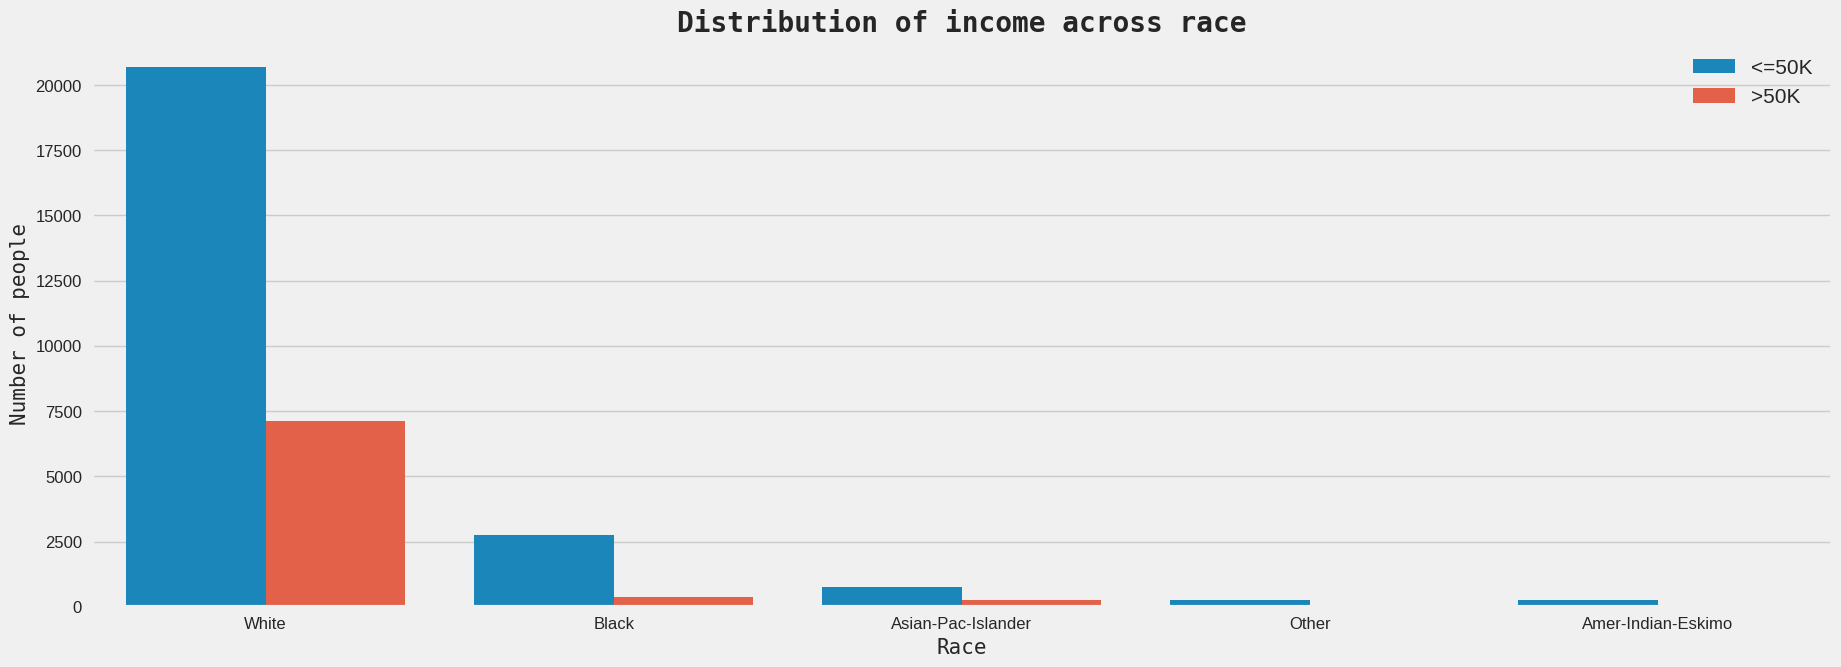

In [28]:
# Creating a countplot of income across race
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 7))
sns.countplot(dataset['race'], hue=dataset['income'])
plt.title('Distribution of income across race', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Race', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

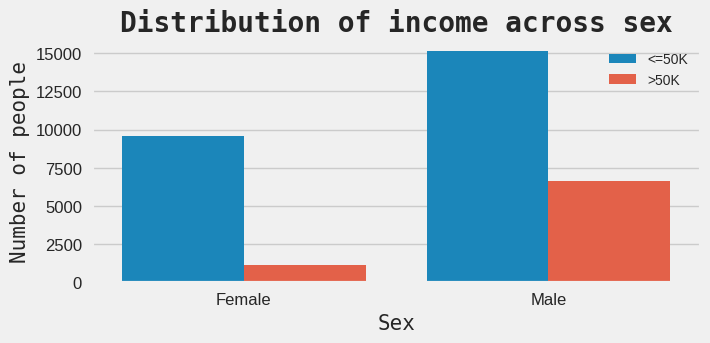

In [29]:
# Creating a countplot of income across sex
plt.style.use('fivethirtyeight')
plt.figure(figsize=(7, 3))
sns.countplot(dataset['sex'], hue=dataset['income'])
plt.title('Distribution of income across sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 10})
plt.savefig('bi3.png')
plt.show()

### 2.3: Multivariate Analysis

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [31]:
dataset['income'] = le.fit_transform(dataset['income'])

In [32]:
# # Creating a pairplot of dataset
# sns.pairplot(dataset)
# plt.savefig('multi1.png')
# plt.show()

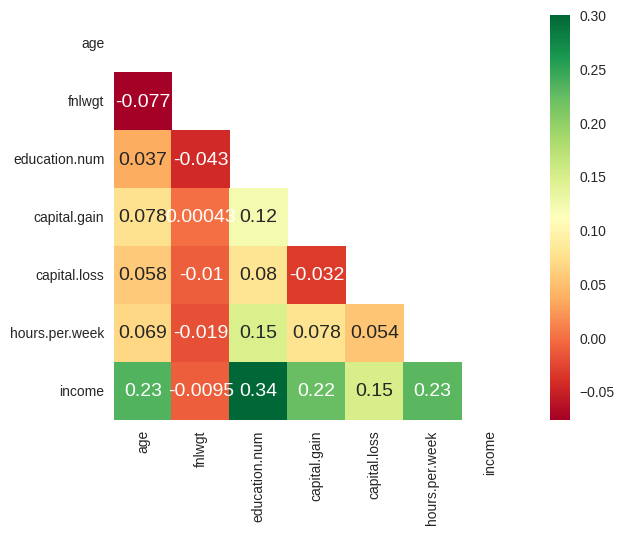

In [33]:
corr = dataset.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,
                     annot=True, cmap='RdYlGn')
plt.savefig('multi2.png')
plt.show()

<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Observations:</h3>

<ul>
        
<li><p style="font-family:verdana;">
In this dataset, the most number of people are young, white, male, high school graduates with 9 to 10 years of education and work 40 hours per week.
</p></li>    

<li><p style="font-family:verdana;">
From the correlation heatmap, we can see that the dependent feature 'income' is highly correlated with age, numbers of years of education, capital gain and number of hours per week.
</p></li>    

</ul>

</div>

## Step 3: Data Preprocessing

### 3.1: Fixing '?' values in the dataset

In [34]:
dataset = dataset.replace('?', np.nan)

In [35]:
# Checking null values
checknan = ((dataset.isnull().sum() / dataset.shape[0]) * 100).astype(str) + ' %'
checknan

age                              0.0 %
workclass          5.638647461687294 %
fnlwgt                           0.0 %
education                        0.0 %
education.num                    0.0 %
marital.status                   0.0 %
occupation         5.660145572924664 %
relationship                     0.0 %
race                             0.0 %
sex                              0.0 %
capital.gain                     0.0 %
capital.loss                     0.0 %
hours.per.week                   0.0 %
native.country    1.7904855501980899 %
income                           0.0 %
dtype: object

In [36]:
columns_with_nan = list(checknan[checknan.values != '0.0 %'].index)
columns_with_nan

['workclass', 'occupation', 'native.country']

In [37]:
for col in columns_with_nan:
  print(f"Check frequency of col {col}: ")
  display(dataset[col].value_counts())
  print("\n")

Check frequency of col workclass: 


Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64



Check frequency of col occupation: 


Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64



Check frequency of col native.country: 


United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

In [38]:
# Because the majority value of 'workclass' is Private: 22696, we fill with mode 
col = 'workclass'
dataset[col].fillna(dataset[col].mode()[0], inplace=True)

# Because the majority value of 'native.country' is United-States: 29170, we fill with mode
col = 'native.country'
dataset[col].fillna(dataset[col].mode()[0], inplace=True)

In [39]:
# Because there are no majority value, so we apply group-by imputation
col = 'occupation'
checkdf = dataset[dataset[col].isnull()]
checkdf.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,0
2,66,Private,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,0
14,51,Private,172175,Doctorate,16,Never-married,NaN,Not-in-family,White,Male,0,2824,40,United-States,1
24,61,Private,135285,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,2603,32,United-States,0
44,71,Private,100820,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,2489,15,United-States,0


In [40]:
NotNanCheckDF = dataset[~dataset[col].isnull()]
NotNanCheckDF.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0


In [41]:
WorkEduMap = NotNanCheckDF.groupby(['workclass', 'education'])[['occupation']].agg(lambda x: pd.Series.mode(x)[0]).reset_index()
display(WorkEduMap)
display(type(WorkEduMap))

,workclass,education,occupation
0,Federal-gov,10th,Craft-repair
1,Federal-gov,11th,Adm-clerical
2,Federal-gov,12th,Adm-clerical
3,Federal-gov,5th-6th,Craft-repair
4,Federal-gov,7th-8th,Handlers-cleaners
...,...,...,...
91,State-gov,Some-college,Adm-clerical
92,Without-pay,7th-8th,Farming-fishing
93,Without-pay,Assoc-acdm,Farming-fishing
94,Without-pay,HS-grad,Adm-clerical


pandas.core.frame.DataFrame

In [42]:
WorkEduMap.loc[(WorkEduMap['workclass'] == "Private") & (WorkEduMap['education'] == "HS-grad"), 'occupation']

41    Craft-repair
Name: occupation, dtype: object

In [43]:
# dataset_imputed = dataset.copy()

In [44]:
def impute_occupation(row):
  work_val = row['workclass']
  edu_val = row['education']
  val = WorkEduMap.loc[(WorkEduMap['workclass'] == work_val) & (WorkEduMap['education'] == edu_val), 'occupation'].values
  # Return value array based on WorkEduMap table, if that value is empty, fill with 'Not available'
  if len(val) == 0:
    val = ['Not Available']
  return val[0]

In [45]:
dataset.loc[dataset['occupation'].isnull(), 'occupation'] = dataset.loc[dataset['occupation'].isnull()].apply(impute_occupation, axis = 1)

### 3.2: Label Encoding

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
for col in dataset.columns:
    if dataset[col].dtypes == 'object':
        encoder = LabelEncoder()
        dataset[col] = encoder.fit_transform(dataset[col])

### 3.3: Feature Selection

In [48]:
# Feature Input: X
X = dataset.drop('income', axis=1)
# Target: y
Y = dataset['income']

### 3.4: Feature Scaling

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

### 3.5: Fixing imbalanced dataset using Oversampling

In [51]:
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    75.92 %
1    24.08 %
Name: income, dtype: object

In [52]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [53]:
ros.fit(X, Y)

RandomOverSampler(random_state=42)

In [54]:
X_resampled, Y_resampled = ros.fit_resample(X, Y)

In [55]:
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    50.0 %
1    50.0 %
Name: income, dtype: object

### 3.6: Creating a train test split

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.2, random_state=42)

In [57]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (39552, 14)
X_test shape: (9888, 14)
Y_train shape: (39552,)
Y_test shape: (9888,)


## Step 4: Data Modelling

### 4.1: Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)

In [59]:
log_reg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [60]:
Y_pred_log_reg = log_reg.predict(X_test)

## Step 5: Model Evaluation

In [61]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [62]:
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_log_reg) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_log_reg) * 100, 2))

Logistic Regression:
Accuracy score: 76.58
F1 score: 76.49
